<a href="https://colab.research.google.com/github/indrochoco/Playstore-app-Review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
path ='/content/drive/MyDrive/almabetter/capstone project/Copy of Play Store Data.csv'
df = pd.read_csv(path)

In [4]:
path_1='/content/drive/MyDrive/almabetter/capstone project/Copy of User Reviews.csv'
df_1 = pd.read_csv(path_1)

In [35]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [36]:
df_1.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


# **Rating column data type is String format here, so we need to check the rating and convert it to FLoat data type for better analysis**

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10841 non-null  object
 1   Category        10840 non-null  object
 2   Rating          9367 non-null   object
 3   Reviews         10841 non-null  object
 4   Size            10841 non-null  object
 5   Installs        10841 non-null  object
 6   Type            10840 non-null  object
 7   Price           10841 non-null  object
 8   Content Rating  10841 non-null  object
 9   Genres          10840 non-null  object
 10  Last Updated    10841 non-null  object
 11  Current Ver     10833 non-null  object
 12  Android Ver     10839 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [ ]:
df_1.info()

In [ ]:
df.shape

In [ ]:
df_1.shape

In [13]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [17]:
df.Category.unique()
#Basically there should not be "1.9" in the catergory 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

# **Let's clean the data first** 

In [37]:
df[df.Category =='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [38]:
df.loc[10472] = df.loc[10472].shift()


App                                                   NaN
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [39]:
df.App.loc[10472]= df.Category.loc[10472]


In [40]:
df.Category.loc[10472]= np.nan

In [41]:
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

**So,  lets take a look in Genres**

In [ ]:
df.Genres.unique()


**Look like genres are pretty much okay**

In [44]:
type(df.Rating[0])

float

***Now Rating column's data type should be changed, for better analysis***

In [46]:
df.Rating = df.Rating.astype('float')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## **Installs column should be modified properly , as per ease of analysis**

In [48]:
df.Installs = df.Installs.str.replace('+','')

In [51]:
df.Installs = df.Installs.str.replace(',','')

In [52]:
df.Installs = df.Installs.astype('int')

In [ ]:
# MAX installs rows are
df[df.Installs==df.Installs.max()]

##*Now Searching the most installed app's geners*

In [60]:
max_installs= df[df.Installs==df.Installs.max()]

**Okay!!!!**
*These genres are the popular among users*

In [62]:
max_installs.Genres.unique()

array(['Books & Reference', 'Communication', 'Entertainment', 'Arcade',
       'Social', 'Photography', 'Travel & Local', 'Tools', 'Productivity',
       'Video Players & Editors', 'News & Magazines'], dtype=object)

In [67]:
max_installs_good_rating= max_installs.groupby('Genres')['Rating'].mean().sort_values(ascending=False)

In [74]:
max_installs_good_rating

Genres
Photography                4.500000
Arcade                     4.500000
Tools                      4.400000
Productivity               4.400000
Social                     4.325000
Entertainment              4.300000
Travel & Local             4.260000
Communication              4.173684
Video Players & Editors    4.100000
News & Magazines           3.900000
Books & Reference          3.900000
Name: Rating, dtype: float64

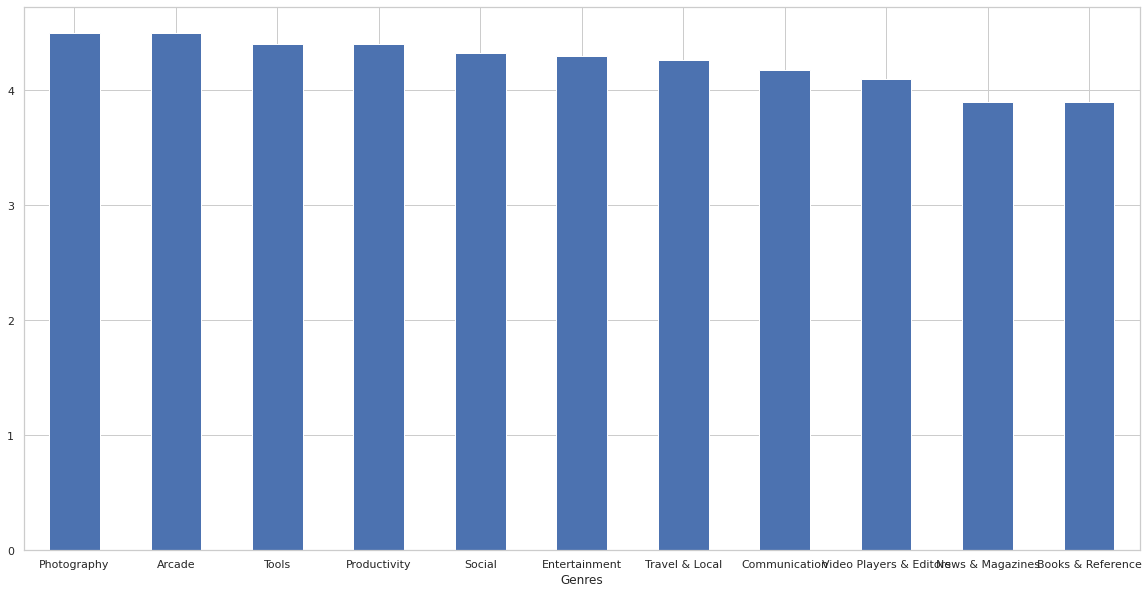

In [80]:
plt.rcParams['figure.figsize'] = (20, 10)
ax = max_installs_good_rating.plot.bar( rot=0)

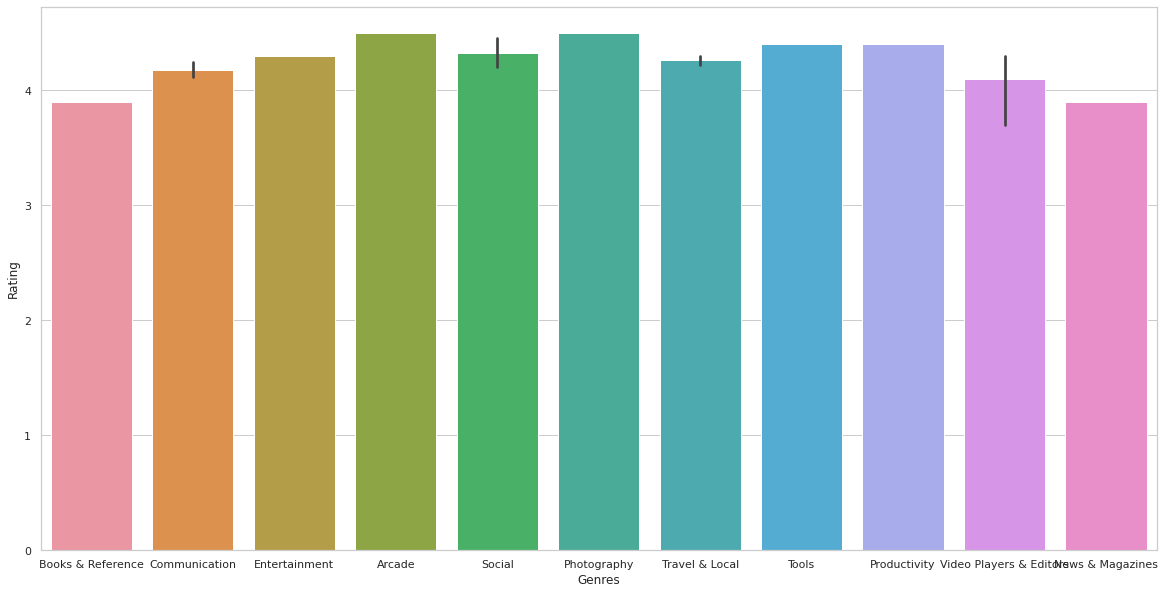

In [83]:

ax = sns.barplot(x="Genres", y="Rating", data=max_installs)